In [12]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [13]:
import pickle

pickle_file = '-data.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    typesList = save['typesList']
    del save

In [14]:
import os
from scipy import misc

imageFolder = "-temp"

image_dim = 1 # black and white
image_size = 32

data = []

fileNames = os.listdir(imageFolder)

# print "number of images:", len(fileNames)

# typesList = list(set([fileName.split("_")[0] for fileName in fileNames]))
# typesDict = {}
# for i, t in enumerate(typesList):
#     typesDict[t] = i
    
for fileName in fileNames:

    img = misc.imread("/".join([imageFolder, fileName]))

    if image_dim == 1 and len(img.shape) > 2: 
        img = img[:,:,0] # convert to black and white

    if img.shape[0] != image_size or img.shape[1] != image_size:
        img = misc.imresize(img, (image_size, image_size), interp='nearest')

    img = (img - img.mean()) / img.std() / 4 + 0.5

    data.append([img])

print "Load data complete"

number of images: 3
Load data complete


In [15]:
import numpy as np

X = np.ndarray((len(data), image_size, image_size), dtype=np.float32)

for i, d in enumerate(data):
    X[i] = d[0]

In [16]:
# number of classes
num_classes = 3

# image dimensions
img_rows, img_cols = X.shape[1],  X.shape[2]

if K.image_dim_ordering() == 'th':
    X = X.reshape(X.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [17]:
# model hyperparameters
batch_size = 32
nb_epoch = 30

# network architecture
patch_size_1 = 3
patch_size_2 = 3

depth_1 = 32
depth_2 = 32

pool_size = 2

num_hidden_1 = 128
num_hidden_2 = 128

dropout = 0.5

In [18]:
model = Sequential()

model.add(Convolution2D(depth_1, patch_size_1, patch_size_1,
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(depth_2, patch_size_2, patch_size_2, border_mode='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())

model.add(Dense(num_hidden_1))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_hidden_2))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_classes))

model.add(Activation('softmax'))

In [19]:
model.load_weights("-model.hdf5")

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [20]:
y = model.predict(X)
pred = np.argmax(y,1)

predicted category: cone


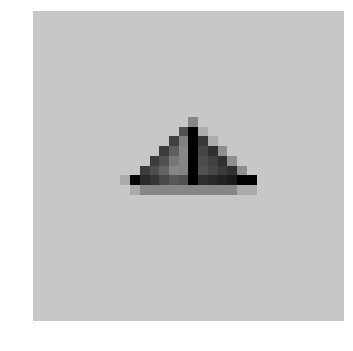

predicted category: cube


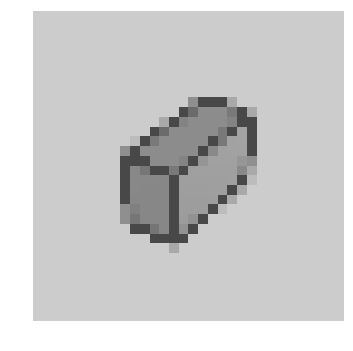

predicted category: cylinder


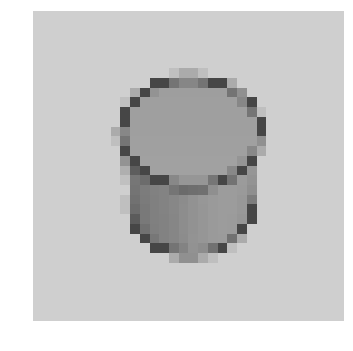

In [21]:
%matplotlib inline

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

# img_index = 0

for i in range(len(data)):
    
    img = X[i][0,:,:]
    print "predicted category:", (typesList[pred[i]])

    imshow(img, cmap = plt.get_cmap('gray'), vmin = -1, vmax = 1,  interpolation='nearest')
    plt.axis('off')
    plt.show()